# Churn Prediction 📊 📞

## Primary Goal:
#### This project uses a dataset from a Phone Provider company the main objective is to highlight the variables associated with churn after finding what variables are most correlated with higher churn rates we make a predictive model to further prove the variables that are most correlated with churn then finally develop strategies to prevent churn based on the analysis. 

## Why is this useful:
#### By identifying variables that are responsible for churn we can formulate a strategic plan to implement necessary changes in the business to improve customer retention - Repeat customers spend 67% more than new customers (BIA Advisory Services)


## Data Overview:
#### A variety of variables involved with churning including the types of services provided by the company, customer demographics, and reported churn statistics.
## Methodology:

#### 1: Data Reading
importing the CSV file and displaying the variables

#### 2: Data Cleaning
This particular data had already been cleaned, we checked for null values, missing columns, duplicate values, etc.

#### 3: EDA
Typically this section would be longer, but we already had an idea of the variables that would contribute to churning. The main goal was to get an idea of what variables had the greatest correlation with the churn rates for this company. We demonstrate this in a variety of different plots.

#### 4: Feature Engineering  
Now, computers are really good at understanding numbers, but they can struggle with categories. So, before we can use this data to make predictions (like whether a customer will churn or not), we need to convert these categories into a format that a computer can understand. This is where one-hot encoding comes in.

One-hot encoding is a process of converting categorical data into a format that works better with classification and regression algorithms. It creates new binary columns for each category/label present in the original columns.

So, in this project, I used one-hot encoding to convert features like ‘TechSupport’, ‘DeviceProtection’, ‘InternetService’, ‘OnlineSecurity’, ‘PaymentMethod’, and ‘Contract’ into a format that your predictive model can understand.

#### 5: Predictive Model Building  
In this project, we implemented a Logistic Regression model to predict customer churn for a phone service company. The main goal was to identify the key factors that influence customer churn and use this information to predict whether a customer is likely to churn.

Logistic Regression was chosen for this task due to its simplicity and interpretability. It not only provides a prediction but also quantifies the influence of each feature on the likelihood of churn. This allows us to understand which aspects of the service are most strongly associated with customer churn.

By predicting churn, the company can proactively address customer concerns, improve customer satisfaction, and ultimately reduce churn. This can lead to significant cost savings, as retaining existing customers is often more cost-effective than acquiring new ones.

#### 6: Results From Predictions & Suggestions
Lastly, we take the insights from the predictive model and formulate them into visual, and actionable insights for the company to implement to reduce churn.

## Where to Connect with Me 😄: 
**LinkedIn:** https://www.linkedin.com/in/aidanszwec

**Portfolio:** https://aidansportfolio.notion.site/Portfolio-65a221015a9f43f989289416d811a016?pvs=74 

**Data Science Writing:** https://medium.com/@aidanszwec_35724

# 1: Data Reading

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('Telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2: Data Cleaning

In [6]:
missing_values = df.isnull().sum()
print(missing_values)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


## Data is clean we now move on to EDA

# 3: EDA

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
No     5174
Yes    1869
Name: Churn, dtype: int64


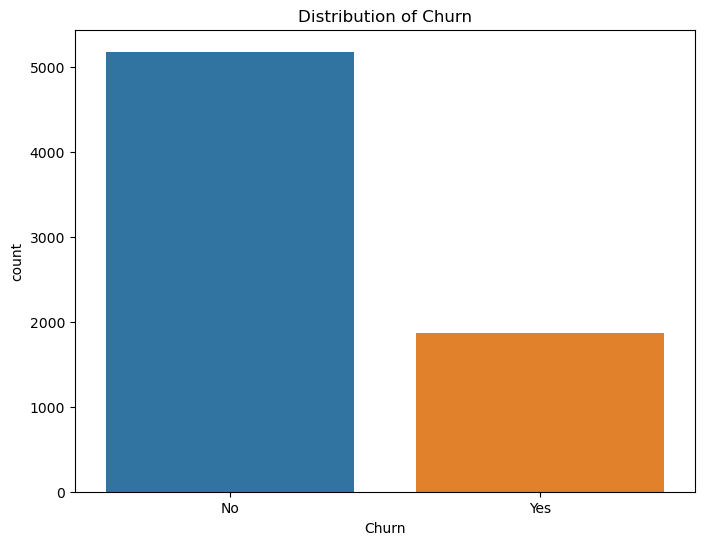

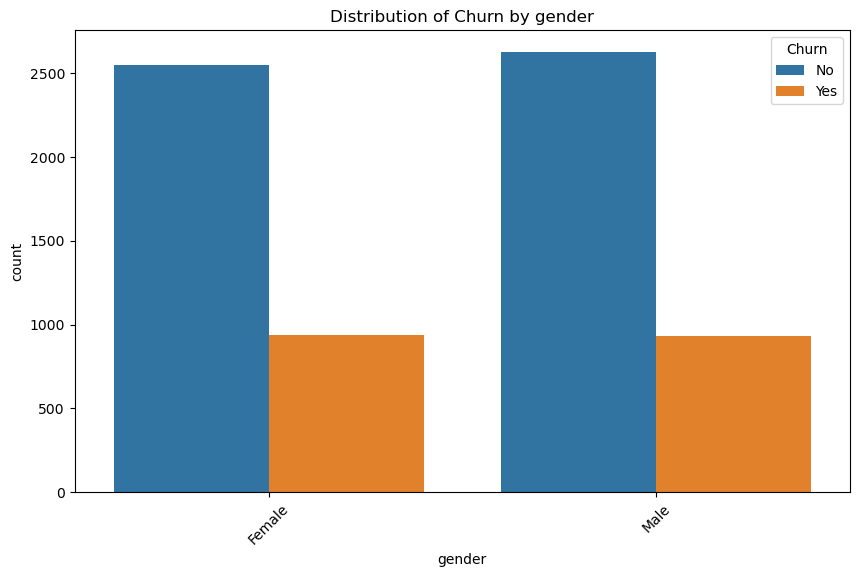

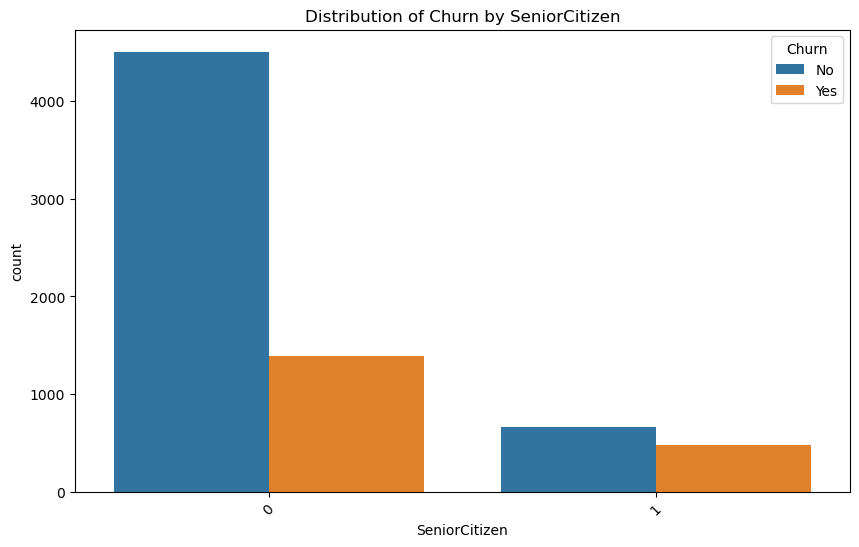

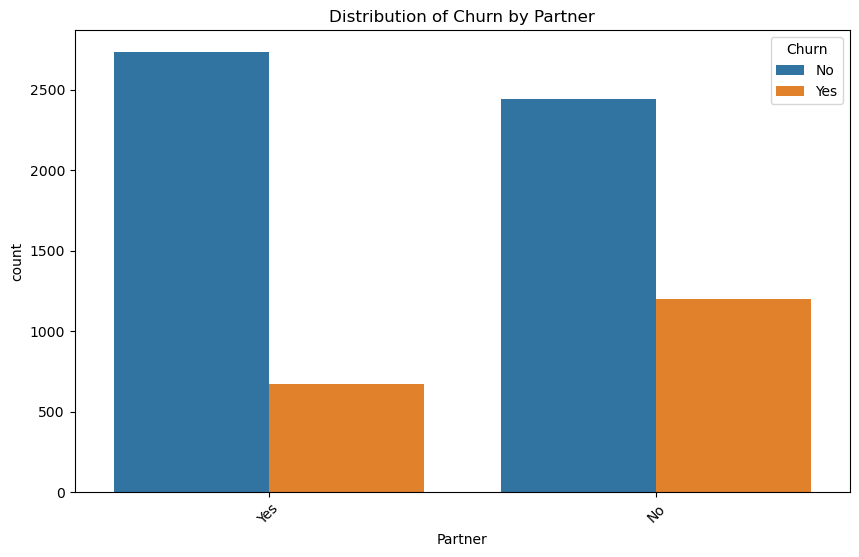

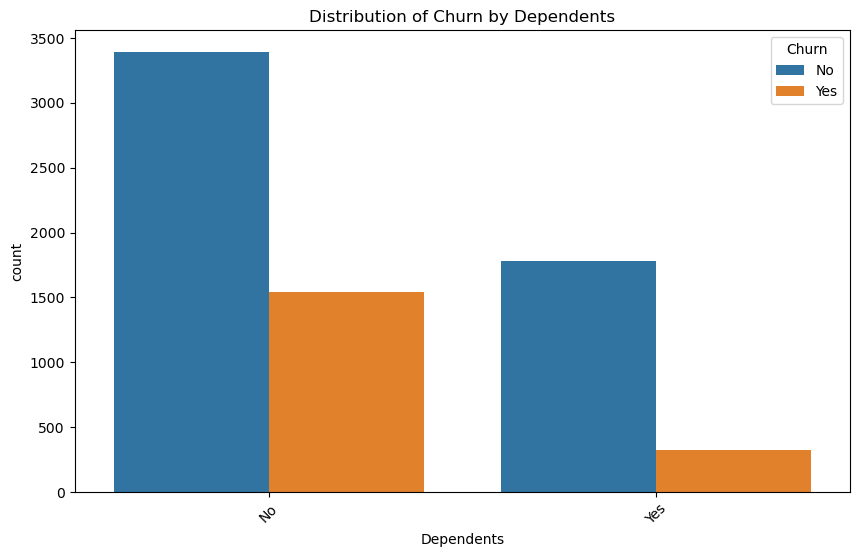

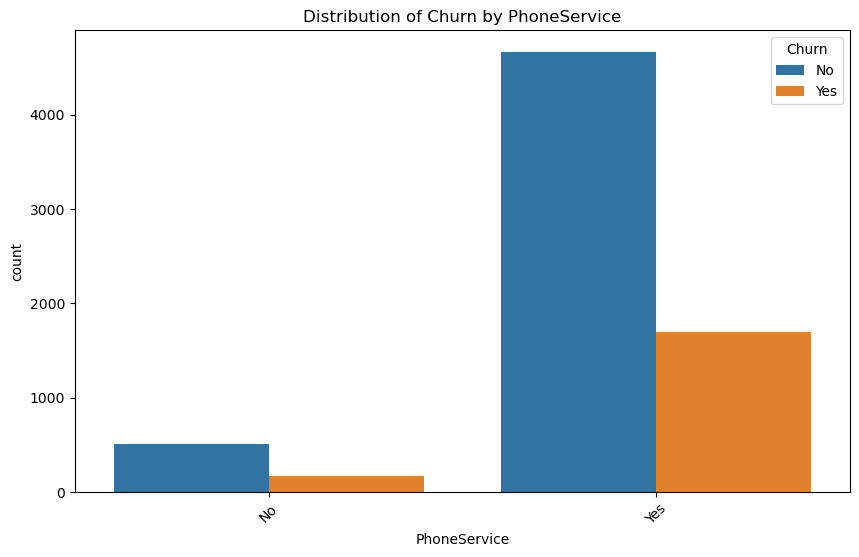

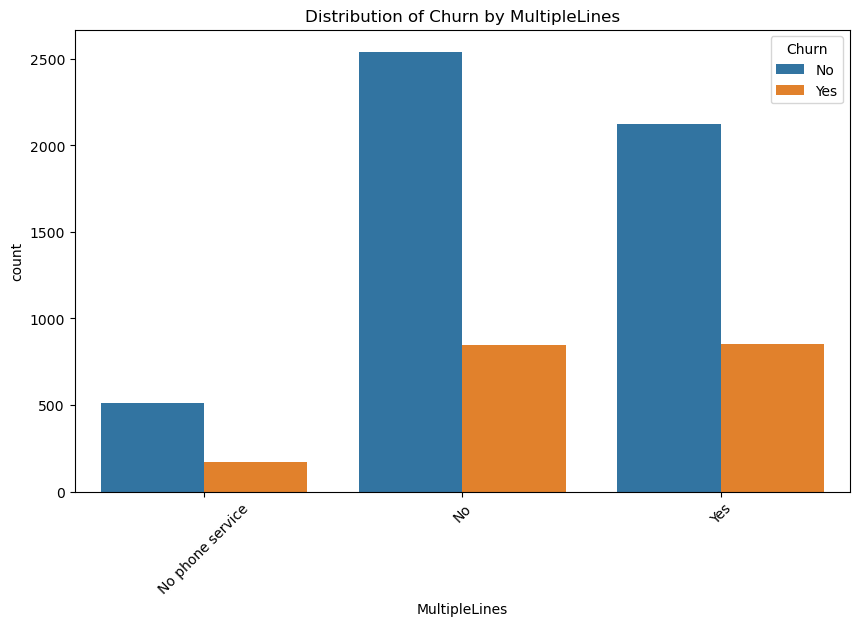

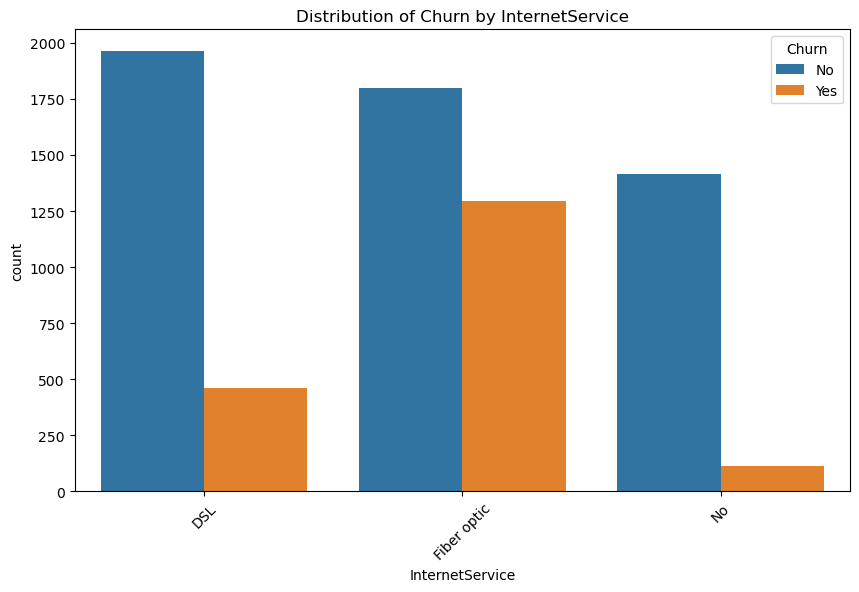

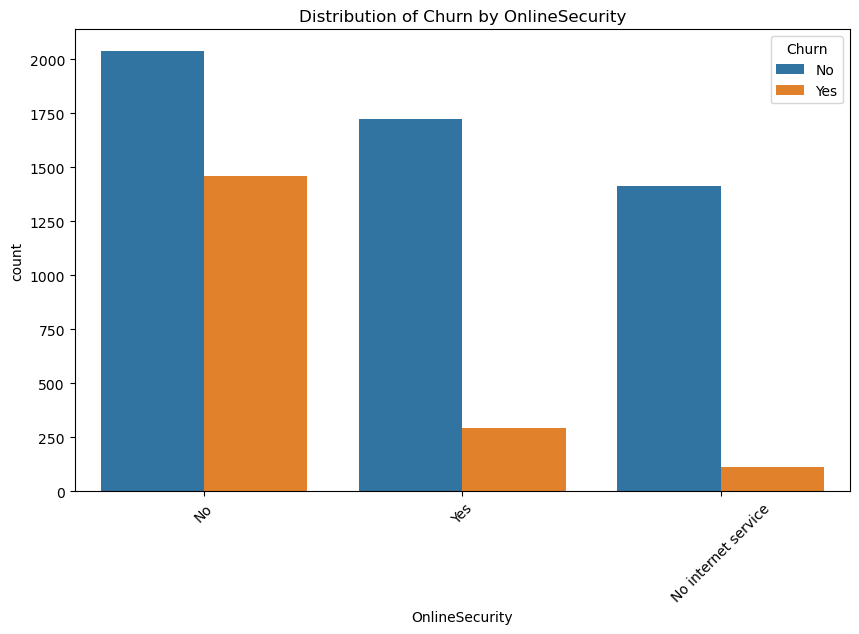

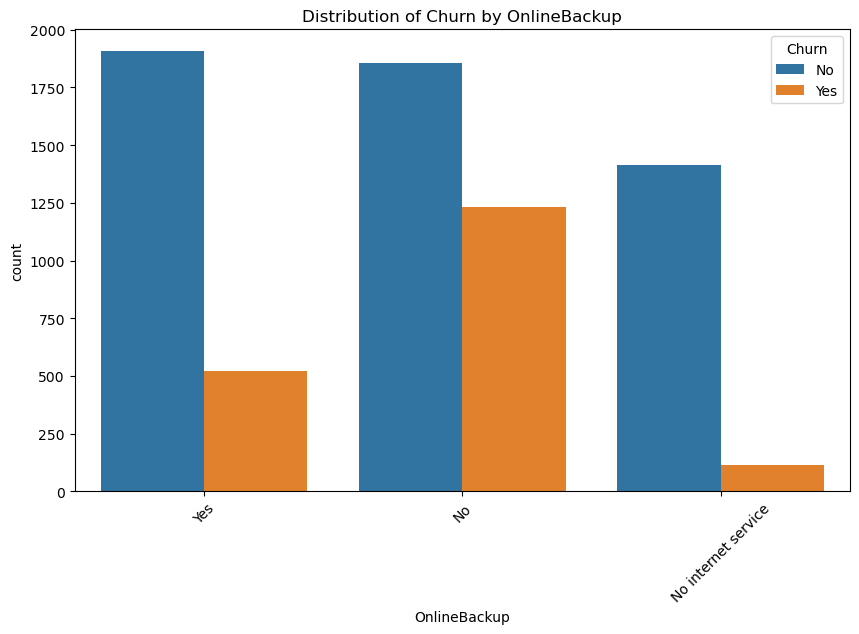

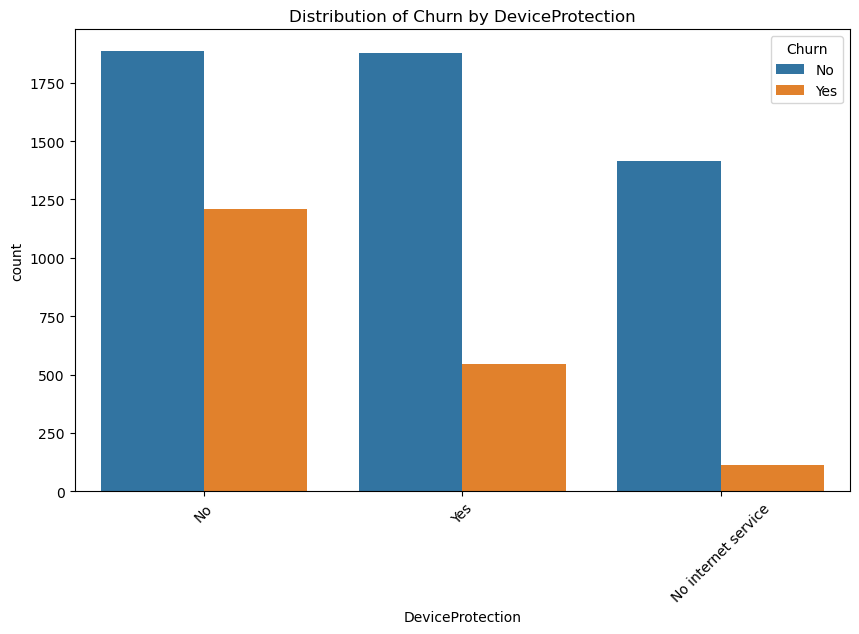

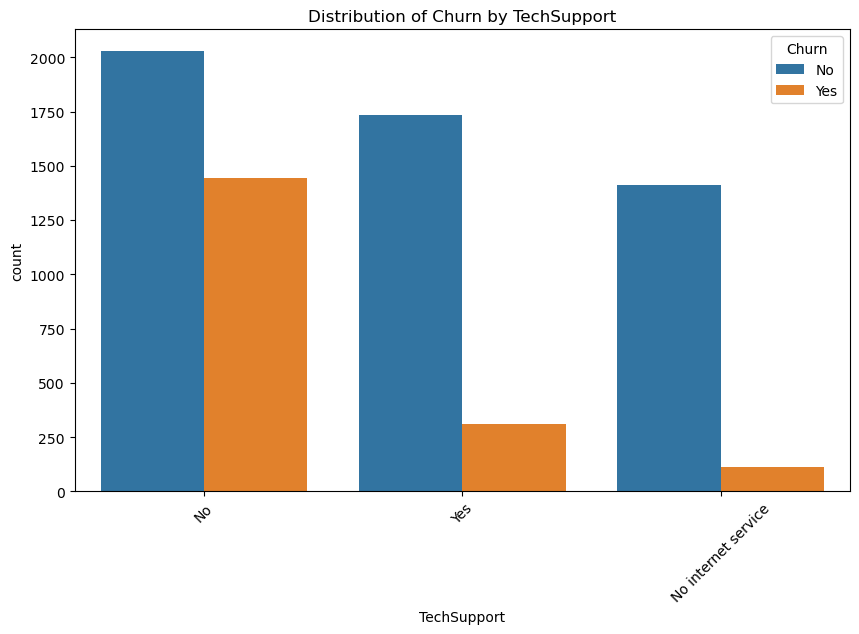

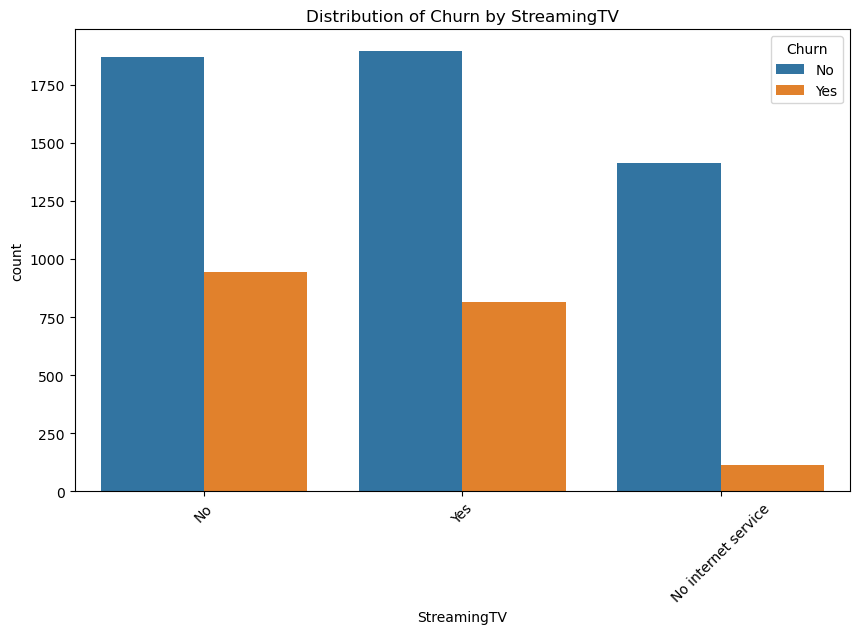

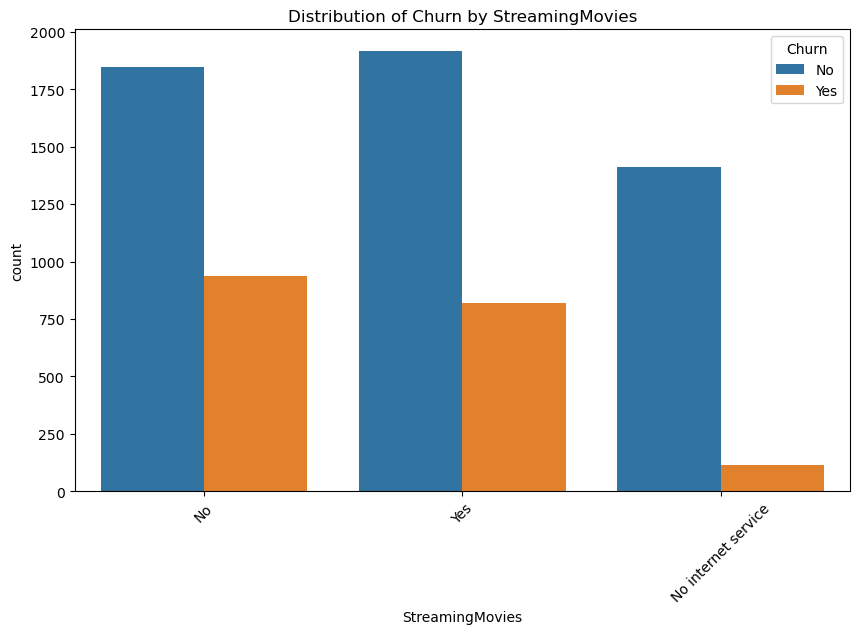

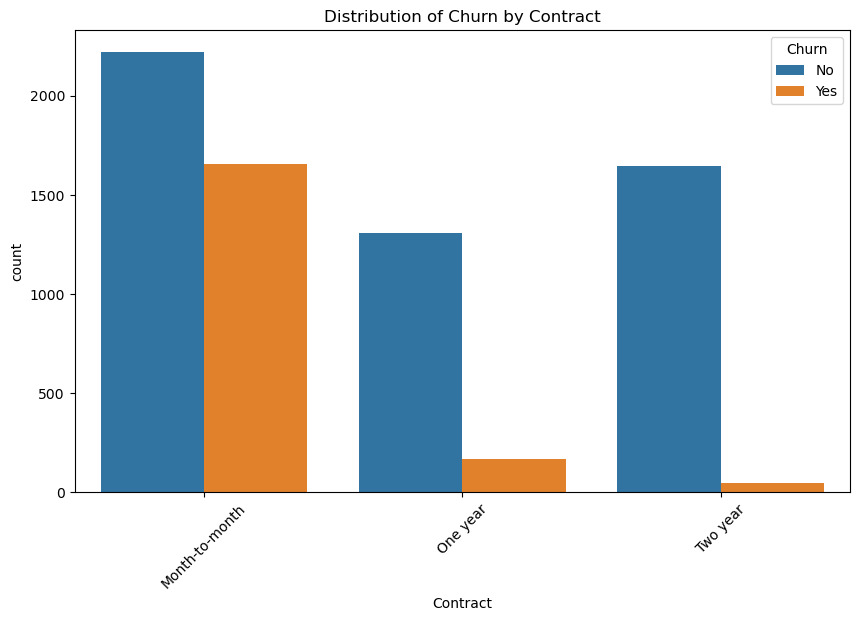

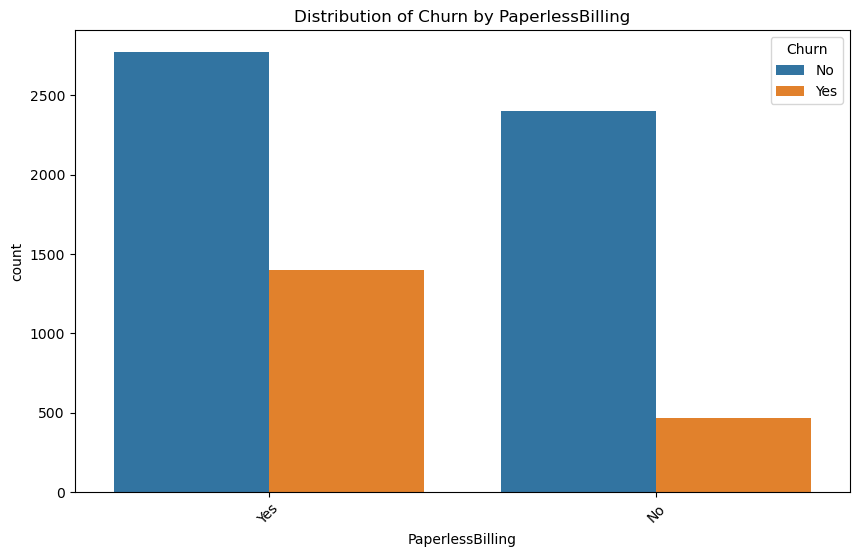

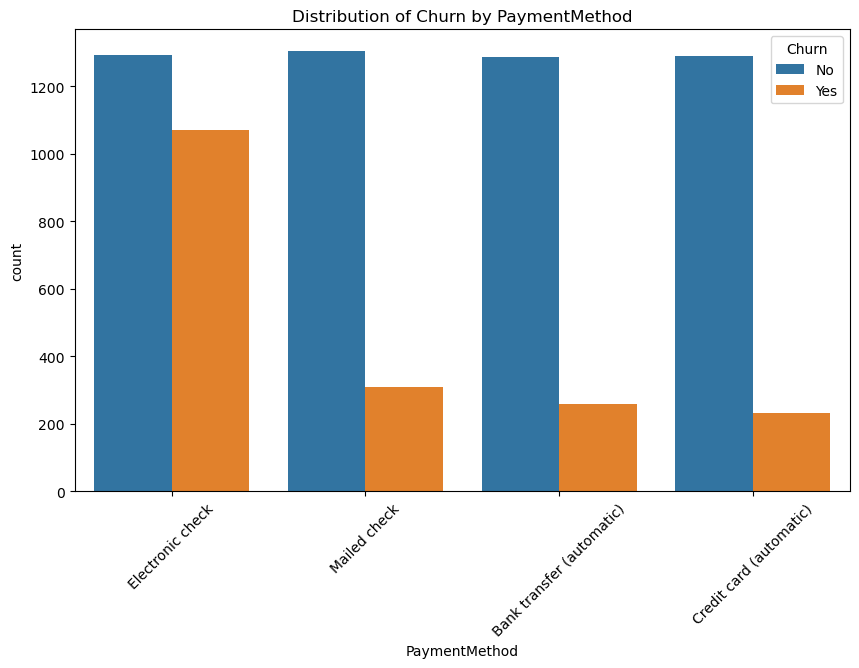

In [9]:
# Summary statistics of the dataset
print(df.describe())

# Check the distribution of the target variable (Churn)
print(df['Churn'].value_counts())

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn')
plt.title('Distribution of Churn')
plt.show()

# Visualize the relationship between categorical features and Churn
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                'Contract', 'PaperlessBilling', 'PaymentMethod']
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'Distribution of Churn by {feature}')
    plt.xticks(rotation=45)
    plt.show()


### This is quite interesting we see that these variables have large impacts on the customer's churn rates the visuals suggest that certain features like TechSupport, DeviceProtection, InternetService, and OnlineSecurity may play a significant role in predicting customer churn. 

### Based on these findings, we can proceed with further analysis to explore the relationships between these features and the target variable (Churn) more deeply. We can visualize these relationships using more detailed plots and explore additional features that may be relevant for predicting churn. We'll start by creating bar plots to visualize the distribution of churn for each of these features. Here's how we can proceed:

## Impact of Key Variables on Churn

### Tech Support
- Customers who did not opt for tech support have a higher churn rate compared to those who did. Approximately 1500 customers who said no to tech support churned, while about 2000 did not churn.

### Device Protection
- Customers without device protection have a higher churn rate compared to those with device protection. Just under 1250 customers without device protection churned, while about 500 customers with device protection churned.

### Internet Service
- Customers using fiber optic internet service have a higher churn rate compared to DSL. Approximately 2000 customers using fiber optic churned, while around 500 using DSL churned.

### Online Security
- Customers who said no to online security have a higher churn rate compared to those who have online security. The churn rate for customers without online security is higher than 2000, while for those with online security, it's around 500.

### Payment Method
- Customers using electronic checks as their payment method have a significantly higher churn rate compared to other payment methods (mailed check, credit card, bank transfer). Approximately 1100 customers using electronic checks churned, while other payment methods had churn rates of around 300.

### Contract Type
- Customers with month-to-month contracts have a higher churn rate compared to those with one or two-year contracts. Approximately 1600 customers on month-to-month contracts churned, while churn rates for one-year and two-year contracts were less than 200 each.



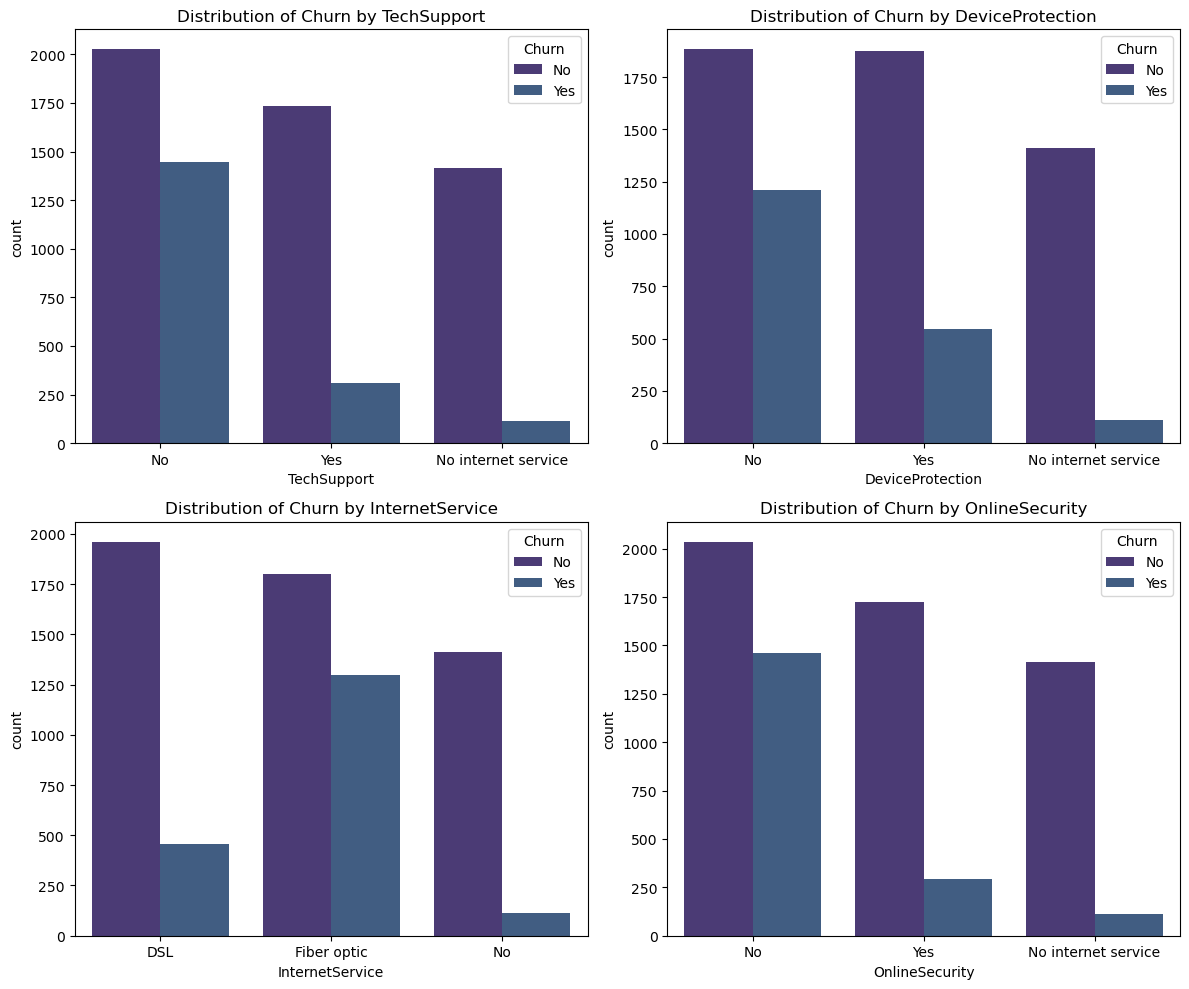

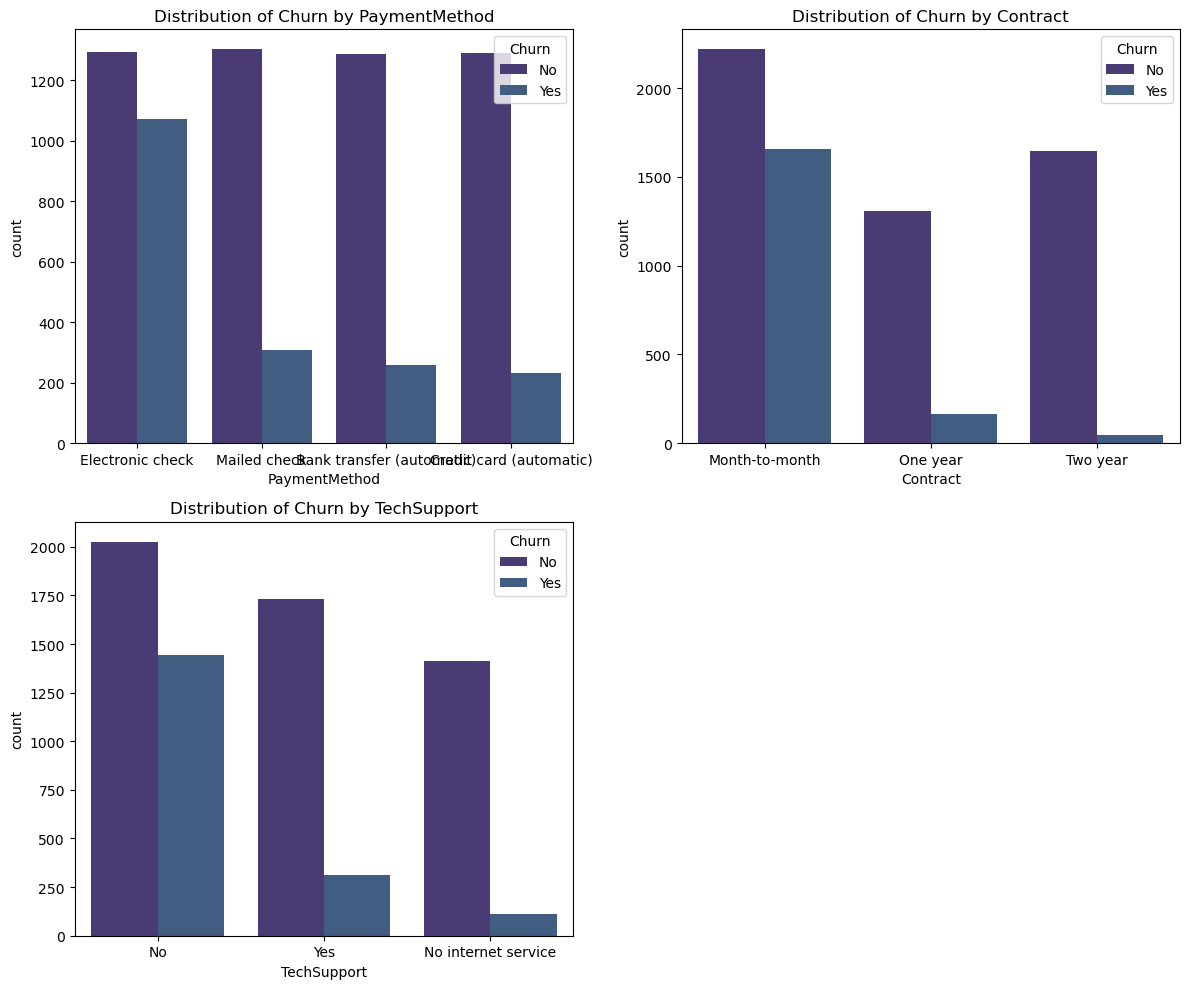

In [187]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.set_palette('viridis')


# Plot distribution of Churn for TechSupport
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Churn by TechSupport')

# Plot distribution of Churn for DeviceProtection
sns.countplot(data=df, x='DeviceProtection', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Churn by DeviceProtection')

# Plot distribution of Churn for InternetService
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Churn by InternetService')

# Plot distribution of Churn for OnlineSecurity
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Churn by OnlineSecurity')

# Adjust layout
plt.tight_layout()
plt.show()

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot distribution of Churn for PaymentMethod
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Churn by PaymentMethod')

# Plot distribution of Churn for Contract
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Churn by Contract')

# Plot distribution of Churn for TechSupport (or any other variable you prefer)
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Churn by TechSupport')

fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


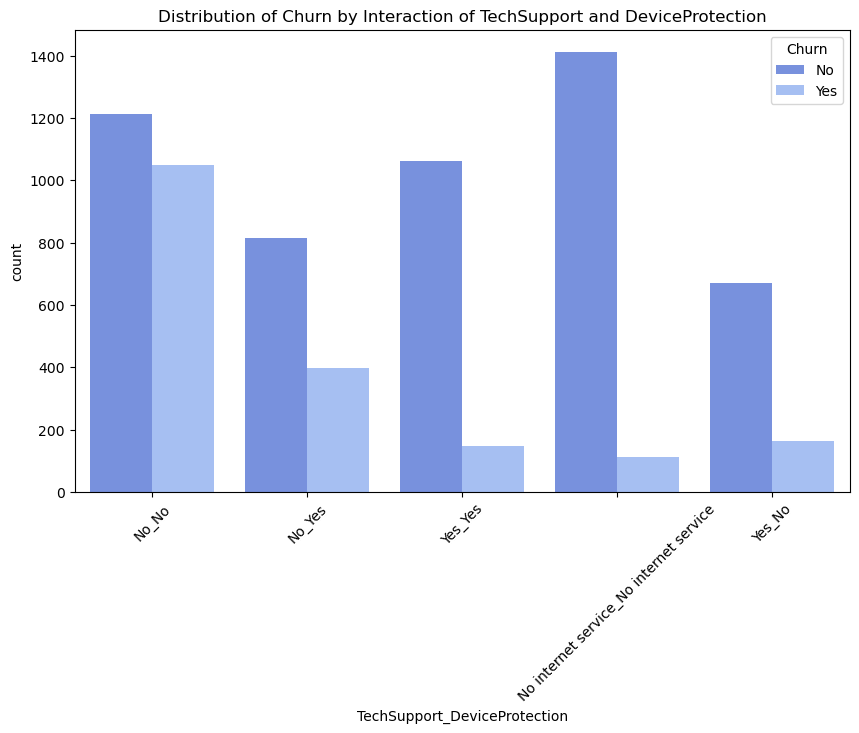

In [188]:
# Interaction effects (example)
df['TechSupport_DeviceProtection'] = df['TechSupport'] + '_' + df['DeviceProtection']
plt.figure(figsize=(10, 6))
sns.set_palette('coolwarm')
sns.countplot(data=df, x='TechSupport_DeviceProtection', hue='Churn')
plt.title('Distribution of Churn by Interaction of TechSupport and DeviceProtection')
plt.xticks(rotation=45)
plt.show()


# 4: Feature Engineering

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define numeric features and categorical features
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod']

# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Define the feature engineering pipeline including polynomial features
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess numerical features
    ('poly', PolynomialFeatures(degree=2))  # Generate polynomial features
])

# Apply feature engineering to the dataset
try:
    X_featured = feature_engineering_pipeline.fit_transform(X)
    print("Shape of the transformed dataset:", X_featured.shape)
except Exception as e:
    print("An error occurred:", e)



Shape of the transformed dataset: (7043, 15)


In [63]:
# Convert TotalCharges to numeric type
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

# Check if there are any non-numeric values after conversion
non_numeric_values = X['TotalCharges'][X['TotalCharges'].apply(lambda x: isinstance(x, str))]
print("Non-numeric values in TotalCharges:", non_numeric_values)

# Now, apply your pipeline
# feature_engineering_pipeline.fit_transform(X)


Non-numeric values in TotalCharges: Series([], Name: TotalCharges, dtype: float64)


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into features (X) and target variable (y)
X = X_featured
y = df['Churn']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = logistic_model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8055358410220014

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.69      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [200]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define numeric features and categorical features
numeric_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod']

# Create preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Apply preprocessing pipelines separately to numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the feature selection pipeline
feature_selection = SelectKBest(score_func=f_classif, k=10)

# Combine preprocessing pipelines and feature selection
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocess numerical and categorical features
    ('feature_selection', feature_selection)  # Select top k features
])

# Specify the indices of numeric and categorical features
numeric_indices = [i for i, feature in enumerate(numeric_features)]
categorical_indices = [i for i, feature in enumerate(categorical_features)]

# Apply feature engineering to the dataset
try:
    # Fit and transform the features
    X_featured = feature_engineering_pipeline.fit_transform(X, y)
    
    # Get the selected feature indices
    selected_indices = feature_selection.get_support(indices=True)
    
    # Combine selected indices from numeric and categorical features
    selected_indices_numeric = [i for i in selected_indices if i in numeric_indices]
    selected_indices_categorical = [i for i in selected_indices if i in categorical_indices]
    
    # Get the selected feature names
    selected_features_numeric = [numeric_features[i] for i in selected_indices_numeric]
    selected_features_categorical = [categorical_features[i] for i in selected_indices_categorical]
    selected_features = selected_features_numeric + selected_features_categorical

    # Print the shape of the transformed dataset
    print("Shape of the transformed dataset after feature scaling and selection:", X_featured.shape)
    print("Selected features:", selected_features)
except Exception as e:
    print("An error occurred:", e)


An error occurred: A given column is not a column of the dataframe


In [82]:
# Print out the data types of each column to identify categorical features
print(df.dtypes)


customerID                       object
gender                           object
SeniorCitizen                     int64
Partner                          object
Dependents                       object
tenure                            int64
PhoneService                     object
MultipleLines                    object
InternetService                  object
OnlineSecurity                   object
OnlineBackup                     object
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
MonthlyCharges                  float64
TotalCharges                     object
Churn                            object
TechSupport_DeviceProtection     object
dtype: object


In [83]:
import pandas as pd

# Convert TotalCharges to numeric type, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any entries that couldn't be converted
non_numeric_values = df[df['TotalCharges'].isnull()]
print("Entries with non-numeric TotalCharges:")
print(non_numeric_values)


Entries with non-numeric TotalCharges:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service    

In [84]:
# Drop rows with missing or non-numeric TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Convert TotalCharges to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Verify that the conversion was successful
print(df.dtypes)


customerID                       object
gender                           object
SeniorCitizen                     int64
Partner                          object
Dependents                       object
tenure                            int64
PhoneService                     object
MultipleLines                    object
InternetService                  object
OnlineSecurity                   object
OnlineBackup                     object
DeviceProtection                 object
TechSupport                      object
StreamingTV                      object
StreamingMovies                  object
Contract                         object
PaperlessBilling                 object
PaymentMethod                    object
MonthlyCharges                  float64
TotalCharges                    float64
Churn                            object
TechSupport_DeviceProtection     object
dtype: object


In [85]:
import pandas as pd

# Read the dataset
df = pd.read_csv('Telco.csv')

# Identify categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Display the encoded dataset
print(df_encoded.head())


   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges Churn  \
0  7590-VHVEG              0       1           29.85        29.85    No   
1  5575-GNVDE              0      34           56.95       1889.5    No   
2  3668-QPYBK              0       2           53.85       108.15   Yes   
3  7795-CFOCW              0      45           42.30      1840.75    No   
4  9237-HQITU              0       2           70.70       151.65   Yes   

   gender_Female  gender_Male  Partner_No  Partner_Yes  ...  \
0              1            0           0            1  ...   
1              0            1           1            0  ...   
2              0            1           1            0  ...   
3              0            1           1            0  ...   
4              1            0           1            0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0        

In [86]:
# Specify the main categorical features to encode
main_categorical_features = ['TechSupport', 'DeviceProtection', 'InternetService', 'OnlineSecurity', 'PaymentMethod', 'Contract']

# Perform one-hot encoding for the main features
df_encoded_main = pd.get_dummies(df, columns=main_categorical_features)

# Display the encoded dataset with only the main features
print(df_encoded_main.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines OnlineBackup StreamingTV  ... OnlineSecurity_No  \
0  No phone service          Yes          No  ...                 1   
1                No           No          No  ...                 0   
2                No          Yes          No  ...                 0   
3  No phone service           No          No  ...                 0   
4                No           No          No  ...                 1   

  OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                               

In [92]:
import pandas as pd

# Assuming df is your original DataFrame containing all features

# Selecting numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
numerical_df = df[numerical_features].copy()

# Selecting categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']

# Encoding categorical features
encoded_categorical_df = pd.get_dummies(df[categorical_features], drop_first=True)

# Concatenating numerical and encoded categorical features
combined_df = pd.concat([numerical_df, encoded_categorical_df], axis=1)

# Displaying the first few rows of combined_df
print(combined_df.head())




   SeniorCitizen  tenure  MonthlyCharges TotalCharges  gender_Male  \
0              0       1           29.85        29.85            0   
1              0      34           56.95       1889.5            1   
2              0       2           53.85       108.15            1   
3              0      45           42.30      1840.75            1   
4              0       2           70.70       151.65            0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            1               0                 0   
1            0               0                 1   
2            0               0                 1   
3            0               0                 0   
4            0               0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                               1                  0  ...   
1                               0                  0  ...   
2                               0                  0  ...   
3                     

In [118]:
import pandas as pd

# Assuming df is your original DataFrame containing all features
# Selecting numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Creating numerical_df with selected numerical features
numerical_df = df[numerical_features].copy()

# Displaying the first few rows of numerical_df
print(numerical_df.head())


   SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65


# 5: Predictive Model Building

In [121]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = combined_df.drop(columns=['Churn'])  # Features
y = combined_df['Churn']  # Target variable

# Further splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5634, 30)
Shape of X_test: (1409, 30)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [120]:
import pandas as pd

# Assuming you have encoded categorical features in 'encoded_categorical_df'
# and numerical features in 'numerical_df'
churn_column = df['Churn']
# Concatenate numerical features, encoded categorical features, and 'Churn' column
combined_df = pd.concat([numerical_df, encoded_categorical_df, churn_column], axis=1)


In [127]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with a chosen strategy, e.g., mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)




In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train_imputed, y_train)

# Predicting on the testing data
y_pred = logistic_model.predict(X_test_imputed)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8168914123491838
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1036
         Yes       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



/Users/aidanszwec/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
# Get the column names of your feature matrix (X)
feature_names = X.columns


In [137]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Train the model on the training data
rf_model.fit(X_train_imputed, y_train)

# Extract feature importances
importances = rf_model.feature_importances_


In [138]:
# Assuming you have your feature importances stored in a variable called `importances`
# You can sort them together
feature_importances = list(zip(feature_names, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)

# Print the top features along with their importance scores
print("Top {} Features:".format(num_top_features))
for feature, importance in feature_importances[:num_top_features]:
    print("{}: {:.4f}".format(feature, importance))


Top 10 Features:
TotalCharges: 0.2011
MonthlyCharges: 0.1686
tenure: 0.1660
InternetService_Fiber optic: 0.0401
PaymentMethod_Electronic check: 0.0350
Contract_Two year: 0.0297
OnlineSecurity_Yes: 0.0279
gender_Male: 0.0275
PaperlessBilling_Yes: 0.0260
Partner_Yes: 0.0241


## What we are doing now is Interpreting the Model Coefficients: 

### Since we've trained  a logistic regression model, you can interpret the coefficients to understand how each feature contributes to the likelihood of churn. Positive coefficients indicate features that increase the odds of churn, while negative coefficients indicate features associated with lower churn likelihood. We'll extract and analyze the coefficients from the trained logistic regression model. Explore Feature Importance: We'll further explore the top features identified by importance scores. Understanding the relationship between these features and churn will provide valuable insights into customer behavior and churn drivers.



In [139]:
# Get the coefficients and intercept from the trained logistic regression model
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Create a DataFrame to display the coefficients along with the corresponding feature names
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Display the coefficients DataFrame
print("Model Coefficients:")
print(coefficients_df)

# Display the intercept
print("\nIntercept:", intercept)


Model Coefficients:
                                  Feature  Coefficient
0                           SeniorCitizen     0.229980
1                                  tenure    -0.059239
2                          MonthlyCharges     0.004689
3                            TotalCharges     0.000278
4                             gender_Male    -0.043068
5                             Partner_Yes     0.106145
6                          Dependents_Yes    -0.162843
7                        PhoneService_Yes    -0.453159
8          MultipleLines_No phone service     0.262056
9                       MultipleLines_Yes     0.215288
10            InternetService_Fiber optic     0.563614
11                     InternetService_No    -0.117579
12     OnlineSecurity_No internet service    -0.117579
13                     OnlineSecurity_Yes    -0.598266
14       OnlineBackup_No internet service    -0.117579
15                       OnlineBackup_Yes    -0.252158
16   DeviceProtection_No internet service    

## Here's an interpretation of the insights provided by the model coefficients:

1. **SeniorCitizen**: Customers who are senior citizens have a higher likelihood of churn. Consider offering targeted promotions or personalized assistance to this demographic to improve retention.

2. **Tenure**: Longer tenure is associated with lower churn rates. Focus on nurturing long-term customer relationships through loyalty programs, exclusive offers, and proactive customer support.

3. **MonthlyCharges**: Higher monthly charges increase the likelihood of churn. Explore options to optimize pricing strategies, such as offering flexible payment plans or discounts for bundling services.

4. **Partner_Yes**: Customers with partners are less likely to churn. Encourage family or household sign-ups by highlighting benefits for multiple users or offering family-friendly packages.

5. **InternetService_Fiber optic**: Customers with fiber optic internet service have a higher churn risk. Investigate reasons behind dissatisfaction with this service and address issues related to performance, reliability, or pricing.

6. **Contract_Two year**: Customers on two-year contracts are less likely to churn. Encourage longer-term commitments by offering incentives or discounts for extended contract durations.

7. **TechSupport_Yes**: Customers with access to tech support services are less likely to churn. Enhance technical support offerings, provide timely assistance, and promote self-service options to improve customer satisfaction and retention.



let's interpret these coefficients in a simpler way:

- **Positive Coefficients**: These are things that make it more likely for someone to leave (or "churn"). If these things increase, the chance of churn also increases. In your model, being a "SeniorCitizen," having higher "MonthlyCharges," being a "Partner_Yes," using "InternetService_Fiber optic," having "MultipleLines_No phone service," having "MultipleLines_Yes," watching "StreamingTV_Yes," watching "StreamingMovies_Yes," and using "PaperlessBilling_Yes" and "PaymentMethod_Electronic check" are all things that make churn more likely.

- **Negative Coefficients**: These are things that make it less likely for someone to leave. If these things increase, the chance of churn decreases. In your model, having a longer "tenure," being a "gender_Male," being a "Dependent_Yes," having a "PhoneService_Yes," using "InternetService_No," having "OnlineSecurity_No internet service," having "OnlineSecurity_Yes," having "OnlineBackup_No internet service," having "OnlineBackup_Yes," having "DeviceProtection_No internet service," having "DeviceProtection_Yes," having "TechSupport_No internet service," having "TechSupport_Yes," having "StreamingTV_No internet service," having "StreamingMovies_No internet service," having a "Contract_One year," having a "Contract_Two year," using "PaymentMethod_Credit card (automatic)," and using "PaymentMethod_Mailed check" are all things that make churn less likely.

- **Intercept**: This is like the starting point. It's what the chance of churn would be if all the other things were zero. In your model, this starting point is -0.19364551884901368.


# 6: Results From Predictions & Suggestions


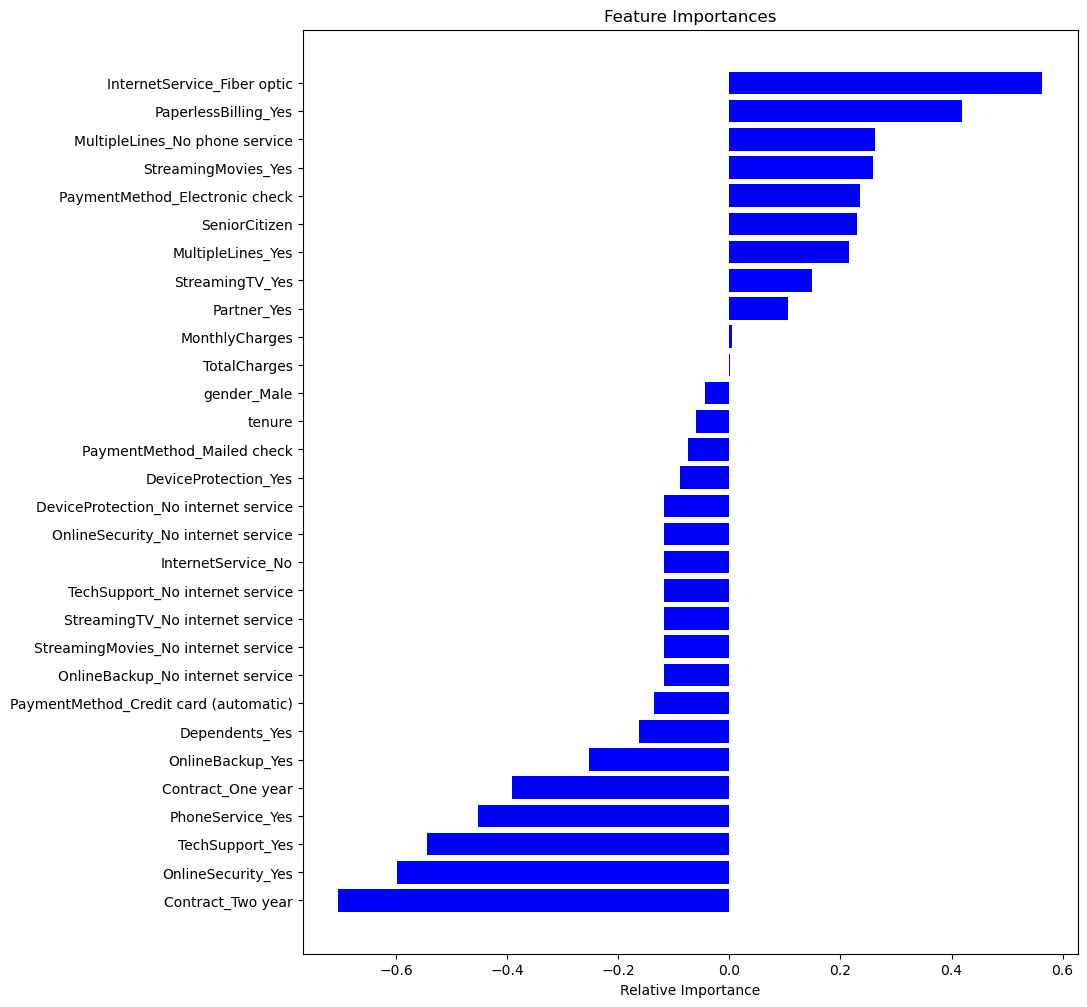

In [154]:
import matplotlib.pyplot as plt
import numpy as np

features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Now use 'features' in the feature importance plot

# Assuming 'logistic_model' is your trained model and 'features' is the list of feature names
importances = logistic_model.coef_[0]
indices = np.argsort(importances)

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


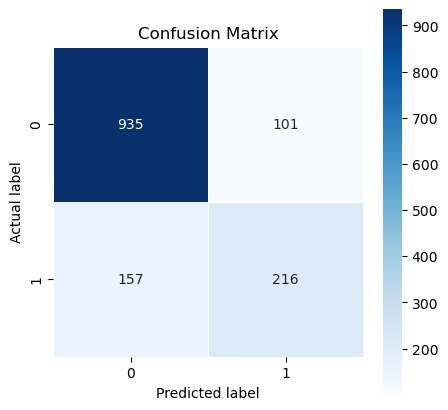

In [141]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


/var/folders/tt/4vvvkt6n7zx9x7hm71czzc280000gn/T/ipykernel_74956/4065289226.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


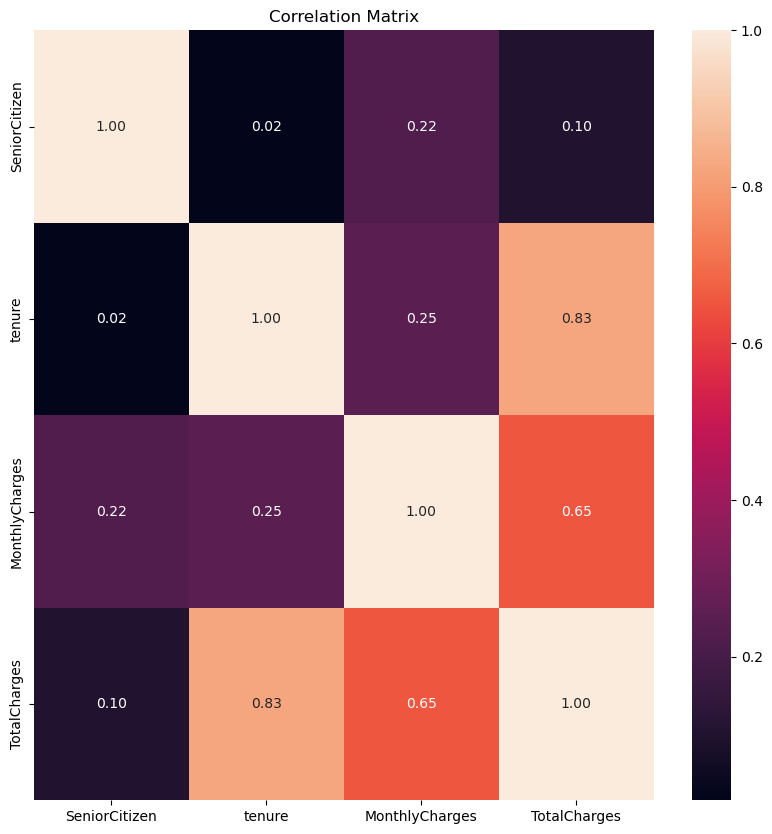

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()




## 1. Feature Importance Plot

This plot shows the importance of each feature in predicting customer churn. The features are listed on the y-axis, and their corresponding coefficients (or "importance") are on the x-axis.

- **Positive values**: Features that increase the likelihood of churn. The larger the value, the stronger its influence on increasing churn.
- **Negative values**: Features that decrease the likelihood of churn. The larger the value (in absolute terms), the stronger its influence on decreasing churn.

The longer the bar, the more significant the feature is in predicting churn.

## 2. Confusion Matrix

This matrix provides a summary of the predictive results of the model.

- **True Positives (TP)**: These are cases where the model predicted 'Yes' (churn), and the actual label was also 'Yes'.
- **True Negatives (TN)**: These are cases where the model predicted 'No' (no churn), and the actual label was also 'No'.
- **False Positives (FP)**: These are cases where the model predicted 'Yes', but the actual label was 'No'. This is also known as a "Type I error."
- **False Negatives (FN)**: These are cases where the model predicted 'No', but the actual label was 'Yes'. This is also known as a "Type II error."

The diagonal from the top left to the bottom right shows the correct predictions, while the other diagonal shows the incorrect predictions.

## 3. Correlation Matrix

This matrix shows the correlation between different features. Each cell in the matrix shows the correlation coefficient between two features.

- **Positive values**: A positive correlation means that when one feature increases, the other also tends to increase.
- **Negative values**: A negative correlation means that when one feature increases, the other tends to decrease.
- **Values close to +1 or -1**: These features are strongly correlated.
- **Values close to 0**: These features are weakly correlated or not correlated.

The color intensity and the size of the square for each pair of features represent the strength of the correlation. Darker colors represent stronger correlations.



Confusion matrix, without normalization
[[935 101]
 [157 216]]
Normalized confusion matrix
[[0.9  0.1 ]
 [0.42 0.58]]


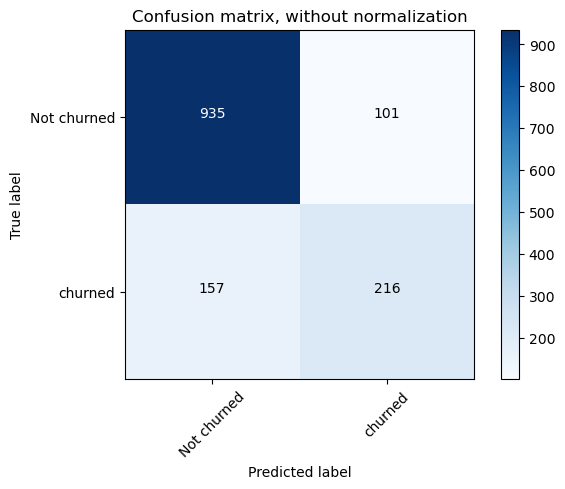

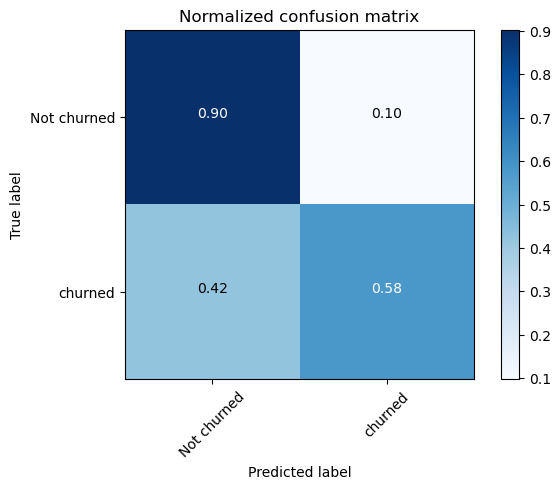

              precision    recall  f1-score   support

 Not churned       0.86      0.90      0.88      1036
     churned       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [198]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(y_test, y_pred, target_names=class_names)
print(eval_metrics)

## Likely for churn to occur when we predict a customer will not churn, churn is also likely when we predict a customer will churn.

### Thank you for looking over this project! Eager to make more in the future 😃📊

**LinkedIn:** https://www.linkedin.com/in/aidanszwec

**Portfolio:** https://aidansportfolio.notion.site/Portfolio-65a221015a9f43f989289416d811a016?pvs=74 

**Data Science Writing:** https://medium.com/@aidanszwec_35724